In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [10]:
file_list = glob.glob('*.csv')

for id, file in enumerate(file_list):
    if id == 0:
        df_first = pd.read_csv(file)
    else:
        df_others = pd.read_csv(file)
        run = pd.concat([df_first, df_others])
        df_first = run
        
run = run.reset_index(drop = True)
run.drop(['run','event'], axis=1, inplace=True)
run

,category,MET,NLepton,Lepton_pt,NJet,Jet_pt[0],Jet_pt[1],Jet_pt[2],Jet_pt[3],NBJet
0,0,17.332981,0,0.000000,3,80.008362,64.519859,49.731693,0.000000,0
1,0,14.389822,0,0.000000,3,48.194252,43.779491,38.346458,0.000000,0
2,0,50.499660,0,0.000000,6,86.771538,59.773155,40.575798,35.191689,0
3,0,50.875053,0,0.000000,5,75.887047,44.317551,29.736355,24.550037,0
4,1,61.229748,1,106.363869,4,285.946442,143.650589,113.178459,36.159710,3
...,...,...,...,...,...,...,...,...,...,...
4995,1,77.758461,0,0.000000,4,76.046310,50.557613,31.904848,26.186810,0
4996,1,92.174377,1,46.825623,5,127.119812,96.379929,81.070824,67.584251,0
4997,0,317.093536,0,0.000000,4,239.849533,214.902664,184.903778,123.011559,0
4998,0,100.236977,1,110.006660,5,128.305618,82.269058,81.433426,23.784449,0


In [11]:
feature_names = run.columns.difference(['category'])

In [12]:
feature_names

Index(['Jet_pt[0]', 'Jet_pt[1]', 'Jet_pt[2]', 'Jet_pt[3]', 'Lepton_pt', 'MET',
       'NBJet', 'NJet', 'NLepton'],
      dtype='object')

In [13]:
def color_func(id):
    if id: return ['red']
    else: return ['SteelBlue']

In [14]:
target0 = run[run['category'] == 0]
target1 = run[run['category'] == 1]

In [15]:
a = [target0, target1]

In [16]:
target1

,category,MET,NLepton,Lepton_pt,NJet,Jet_pt[0],Jet_pt[1],Jet_pt[2],Jet_pt[3],NBJet
4,1,61.229748,1,106.363869,4,285.946442,143.650589,113.178459,36.159710,3
9,1,24.106419,0,0.000000,5,147.033295,138.958328,84.371490,80.242310,3
11,1,31.340355,0,0.000000,5,76.728561,74.923141,49.067383,47.970463,1
19,1,164.523636,0,0.000000,4,272.033844,237.371841,134.405121,26.245844,2
30,1,44.842243,1,69.709938,4,264.520050,147.756760,32.263191,28.999552,1
...,...,...,...,...,...,...,...,...,...,...
4978,1,46.420410,1,42.257847,4,128.929947,70.704102,69.388733,64.026215,3
4986,1,31.439007,0,0.000000,5,178.087631,144.289963,48.679161,46.700356,2
4991,1,49.963097,1,23.135675,4,79.604858,55.211864,46.566265,39.852077,1
4995,1,77.758461,0,0.000000,4,76.046310,50.557613,31.904848,26.186810,0


In [17]:
a.loc[:,'Jet_pt[0]']

AttributeError: 'list' object has no attribute 'loc'

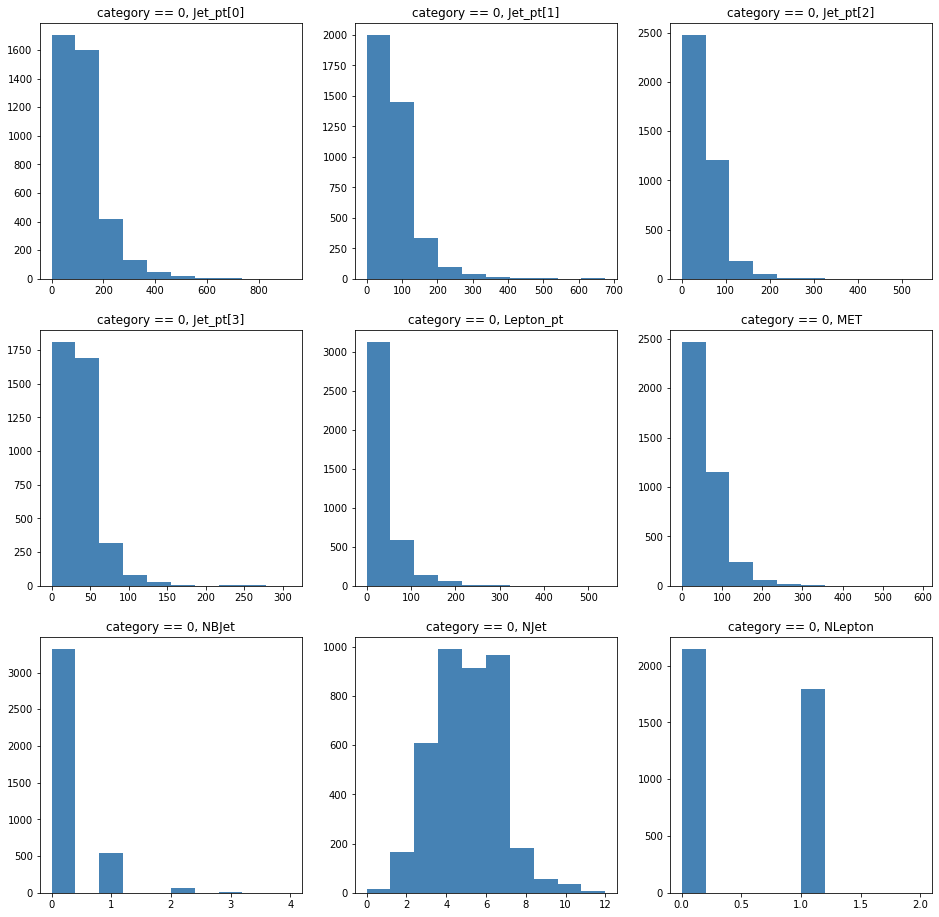

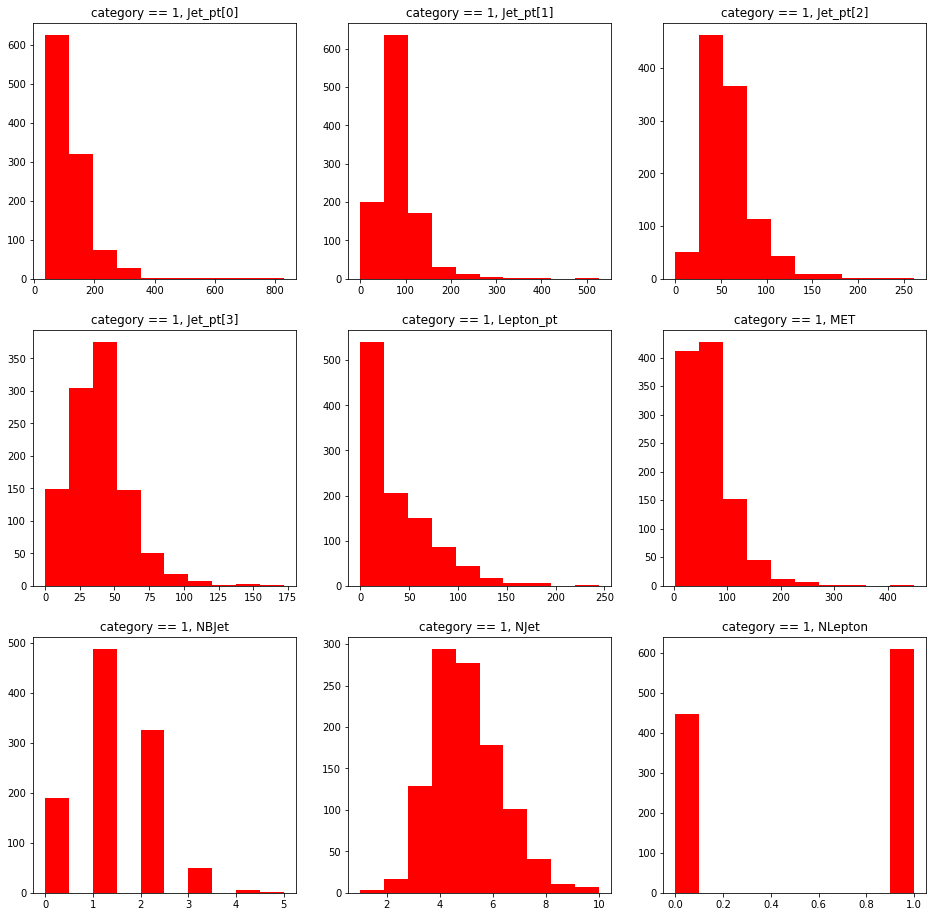

In [18]:
for id, target in enumerate([target0, target1]):
    plt.figure(figsize = (16, 16))
    for idx, columns in enumerate(feature_names):
        plt.subplot(3,3, idx+1)
        plt.title(f'category == {id}, {columns}')
        plt.hist(target.loc[:,columns], color = color_func(id))
plt.show()

In [19]:
run_modify = run[ (run['NLepton'] == 1) & (run['NJet'] >= 4)]

In [20]:
run_modify

,category,MET,NLepton,Lepton_pt,NJet,Jet_pt[0],Jet_pt[1],Jet_pt[2],Jet_pt[3],NBJet
4,1,61.229748,1,106.363869,4,285.946442,143.650589,113.178459,36.159710,3
5,0,51.919724,1,38.960400,4,89.144943,70.722961,56.990292,42.033779,0
10,0,28.572544,1,127.251244,4,90.487793,66.168968,29.373697,25.932457,0
14,0,55.358723,1,37.844395,4,294.977386,259.314819,59.938763,38.546410,0
17,0,40.105106,1,13.119206,6,653.976990,638.985352,542.773682,254.180618,0
...,...,...,...,...,...,...,...,...,...,...
4991,1,49.963097,1,23.135675,4,79.604858,55.211864,46.566265,39.852077,1
4992,0,29.324606,1,74.734627,5,40.973011,39.350174,38.226128,37.266262,0
4994,0,70.315613,1,42.120953,4,174.990189,66.869125,53.765808,52.441589,0
4996,1,92.174377,1,46.825623,5,127.119812,96.379929,81.070824,67.584251,0


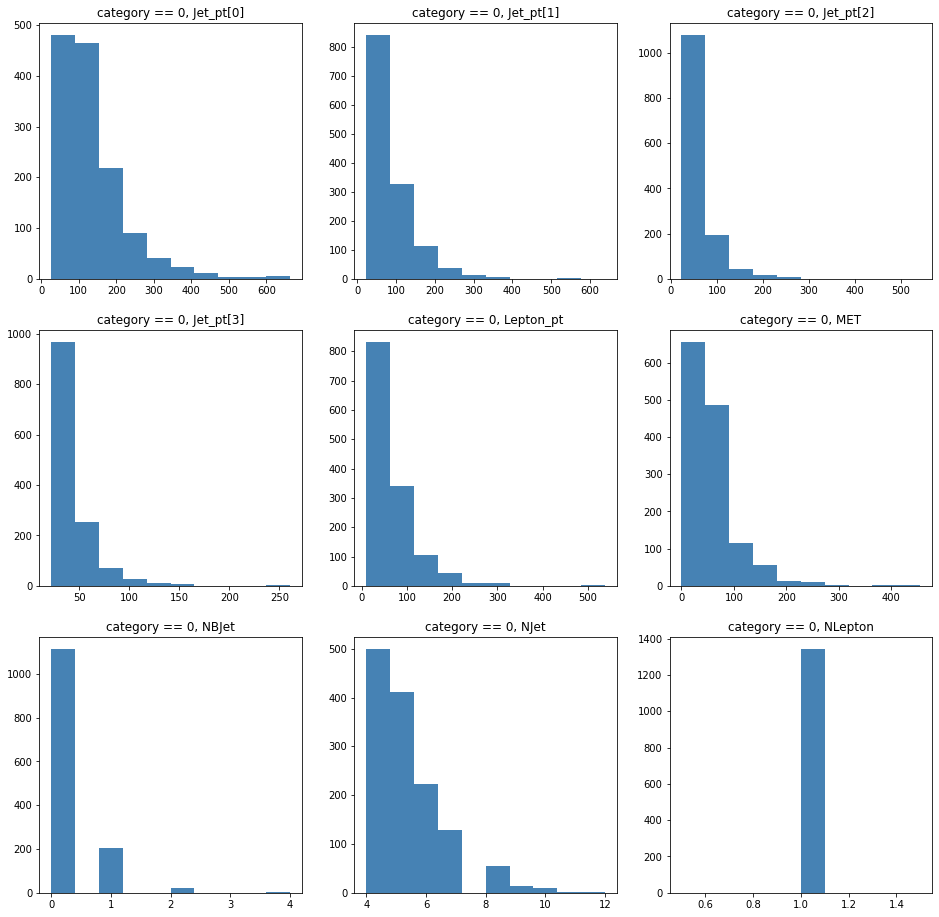

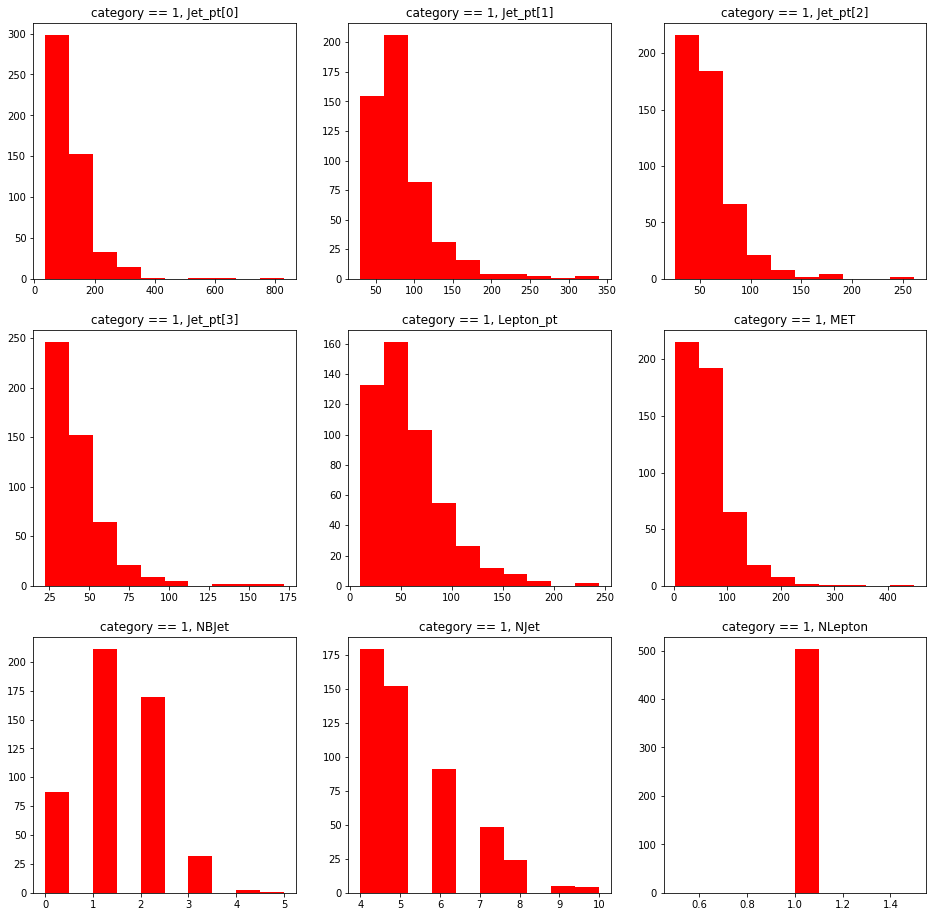

In [21]:
target0 = run_modify[run_modify['category'] == 0]
target1 = run_modify[run_modify['category'] == 1]

for id, target in enumerate([target0, target1]):
    plt.figure(figsize = (16, 16))
    for idx, columns in enumerate(feature_names) :
        plt.subplot(3, 3, idx+1) 
        plt.title(f'category == {id}, {columns}')
        plt.hist(target.loc[:,columns], color = color_func(id))
plt.show()


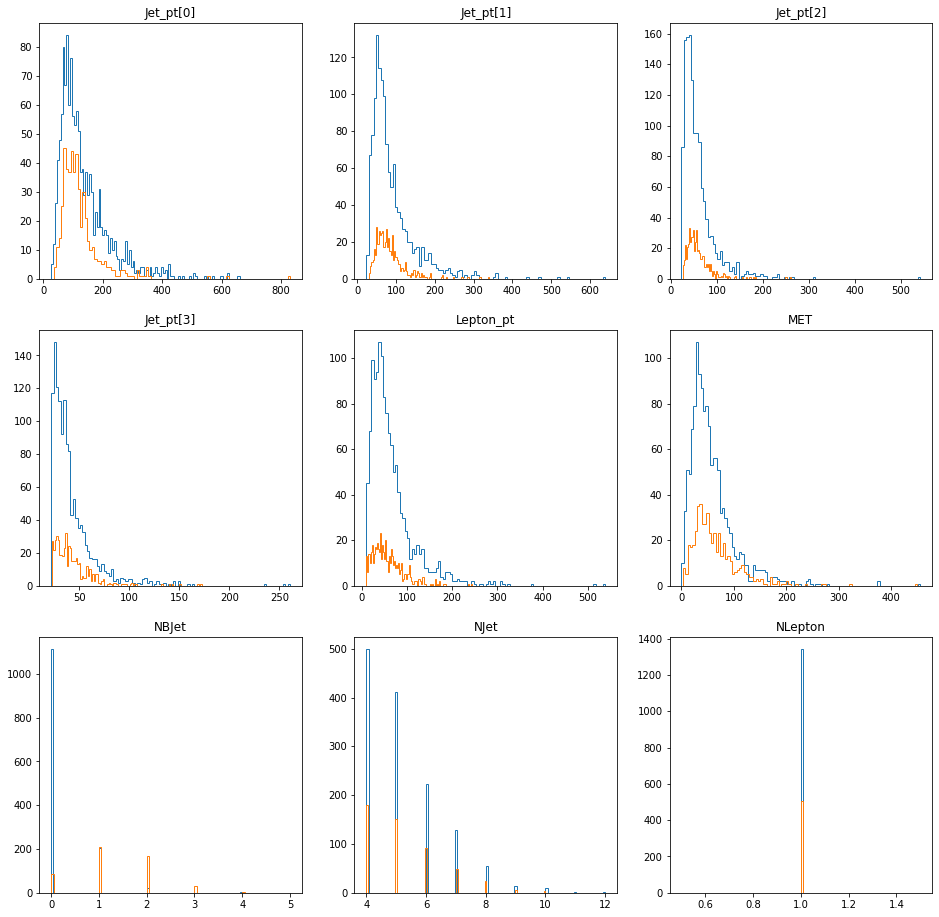

In [22]:
target0 = run_modify[run_modify['category'] == 0]
target1 = run_modify[run_modify['category'] == 1]

plt.figure(figsize = (16, 16))
for idx, columns in enumerate(feature_names):
    plt.subplot(3, 3, idx + 1 )
    for target in [target0, target1]:
        plt.hist(target[columns], bins = 100, histtype = 'step')
        plt.title(columns)
plt.show()

In [23]:
feature_names

Index(['Jet_pt[0]', 'Jet_pt[1]', 'Jet_pt[2]', 'Jet_pt[3]', 'Lepton_pt', 'MET',
       'NBJet', 'NJet', 'NLepton'],
      dtype='object')

In [24]:
target_col = ['Lepton_pt', 'Jet_pt[0]', 'Jet_pt[1]', 'Jet_pt[2]', 'Jet_pt[3]']
x_data = run_modify[target_col]
y_data = run_modify['category']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test = train_test_split(x_data, test_size = 369, random_state = 42)
x_train, x_eval = train_test_split(x_train, test_size = 369, random_state = 42)

y_train, y_test = train_test_split(y_data, test_size = 369, random_state = 42)
y_train, y_eval = train_test_split(y_train, test_size = 369, random_state = 42)

In [27]:
print(f' x_train shape : {x_train.shape}, x_eval shape : {x_eval.shape}, x_test shape : {x_test.shape}\
    \n y_train shape : {y_train.shape}, y_eval shape {y_eval.shape}, y_test shape {y_test.shape}')

 x_train shape : (1107, 5), x_eval shape : (369, 5), x_test shape : (369, 5)    
 y_train shape : (1107,), y_eval shape (369,), y_test shape (369,)


In [28]:
x_train_ary = np.array(x_train) / 500
x_eval_ary = np.array(x_eval) / 500
x_test_ary = np.array(x_test) / 500

y_train_ary = np.array(y_train)
y_eval_ary = np.array(y_eval)
y_test_ary = np.array(y_test)

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def f(x, w, b):
    return np.dot(x, w)  + b 

def df(x, w, b):
    return x, 1

def binary_cross_entropy(z, t):
    return -(t*np.log(z) + (1-t)*np.log(1-z)).mean()